# Analyse Individual Image using IP Widget

FileUpload(value={}, description='Upload')

Total green fluorescence intensity: 81357520


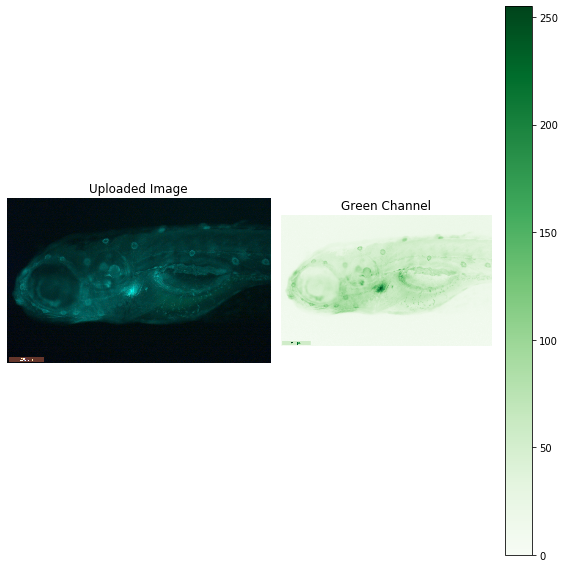

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FileUpload
from IPython.display import display, clear_output
import io

def upload_and_quantify_image(change):
    # Check if the uploaded file is an image
    uploaded_filename = next(iter(change.new))
    if uploaded_filename.endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff')):
        # Read the uploaded image file
        image_bytes = file_upload_widget.value[uploaded_filename]['content']
        image_array = np.frombuffer(image_bytes, dtype=np.uint8)
        image = cv2.imdecode(image_array, flags=cv2.IMREAD_COLOR)

        # Display the uploaded image using Matplotlib
        plt.figure(figsize=(8, 8))
        plt.subplot(121)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Uploaded Image')
        plt.axis('off')  # Hide axis

        # Calculate green fluorescence intensity
        green_channel = image[:, :, 1]  # Green channel is at index 1 (0-based indexing)
        total_intensity = np.sum(green_channel)
        print(f"Total green fluorescence intensity: {total_intensity}")

        # Display the green channel image
        plt.subplot(122)
        plt.imshow(green_channel, cmap='Greens')
        plt.title('Green Channel')
        plt.colorbar()
        plt.axis('off')  # Hide axis

        plt.tight_layout()
        plt.show()
        clear_output(wait=True)  # Clear the output to avoid displaying multiple images

    else:
        print("Please upload a valid image file.")

# Create a file upload widget
file_upload_widget = FileUpload()

# Display the file upload widget
display(file_upload_widget)

# Observe the change event to detect when a file is uploaded
file_upload_widget.observe(upload_and_quantify_image, names='value')


# Analyse multiple images simultaneously

## Define the file path to the folder containing the images 

In [1]:
# Define the directory where your images are uploaded
image_directory = '/Users/pk/Documents/fluorescent_microscope_images'

## Load all the images in the above folder and list thee fluorescent intensities

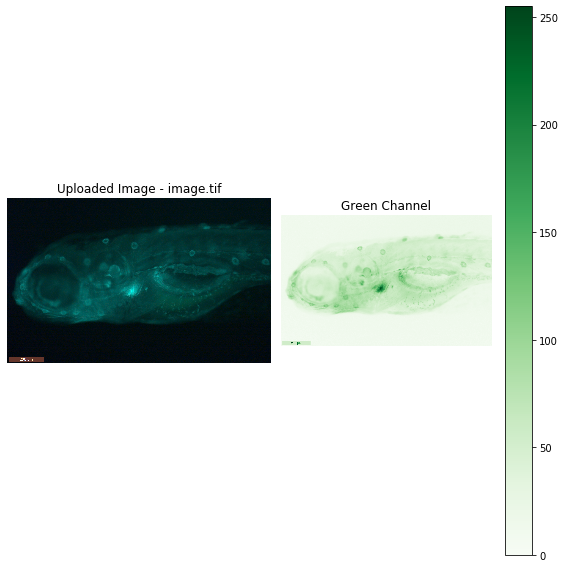

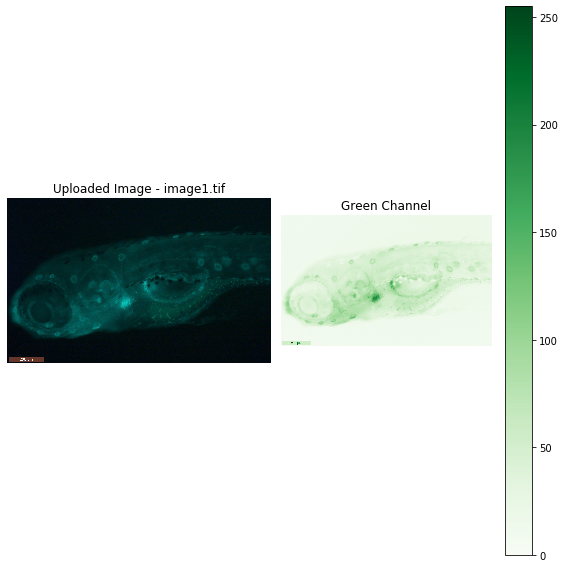

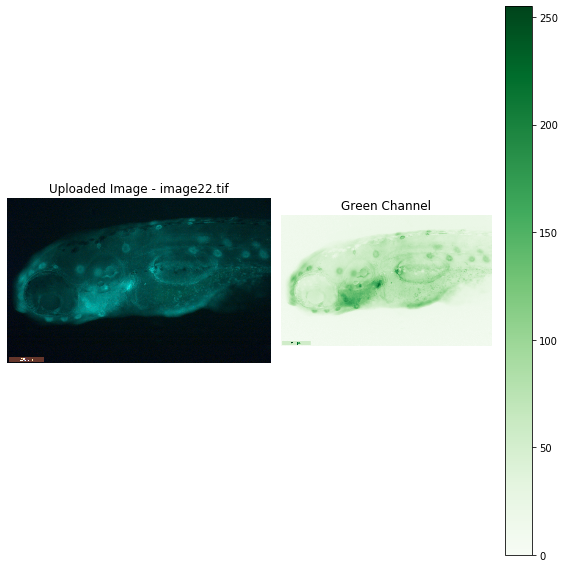

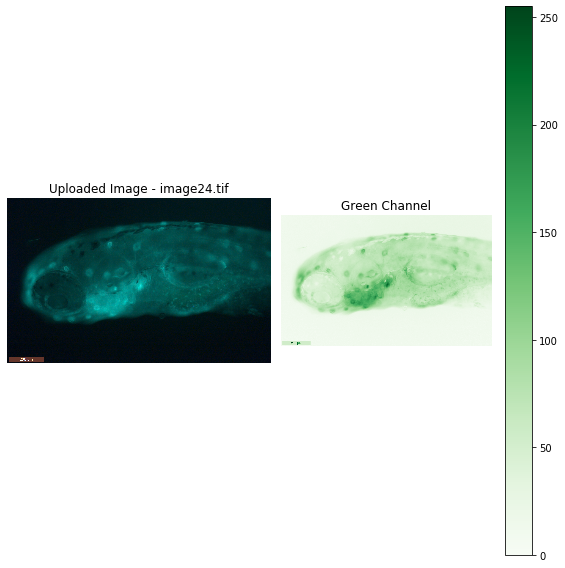

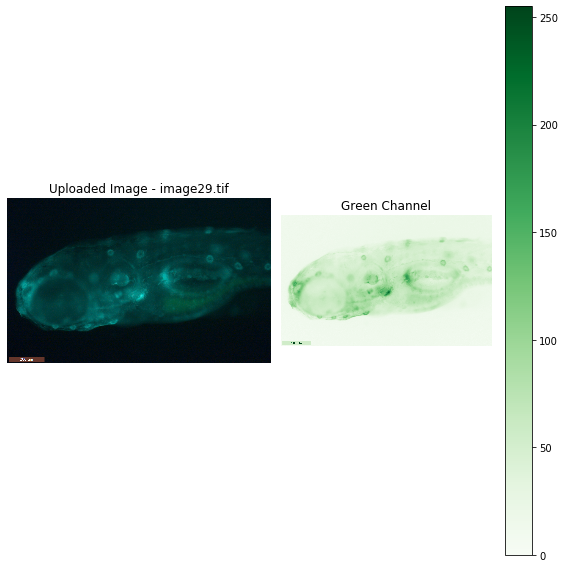

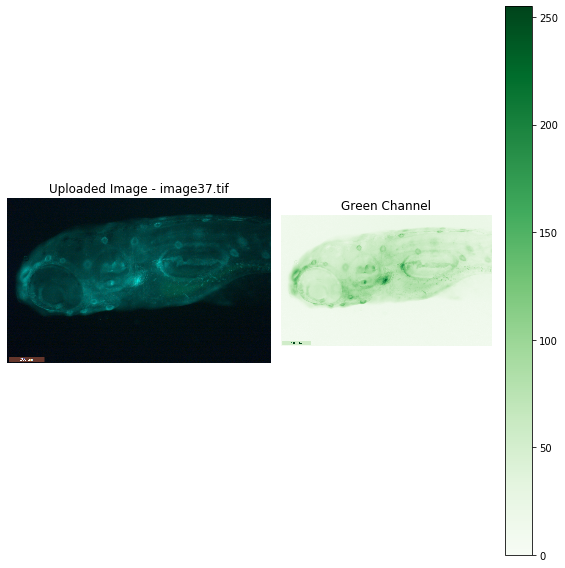

Total green fluorescence intensities:
Image 1: 81357520
Image 2: 72026219
Image 3: 97075878
Image 4: 103551651
Image 5: 84931297
Image 6: 88248164


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import re

def list_image_paths(image_directory):
    file_list = os.listdir(image_directory)
    # Extract the numeric part of the filenames using regular expressions
    numeric_part = lambda x: int(re.search(r'\d+', x).group(0)) if re.search(r'\d+', x) else -1
    # Sort the file list based on the numeric part of the filenames
    file_list.sort(key=numeric_part)
    image_files = [os.path.join(image_directory, file) for file in file_list if file.lower().endswith(('.jpg', '.tif', '.tiff', '.jpeg', '.png', '.gif'))]
    return image_files


def quantify_images_from_paths(image_paths):
    total_intensities = []
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_COLOR)

        # Calculate green fluorescence intensity
        green_channel = img[:, :, 1]  # Green channel is at index 1 (0-based indexing)
        total_intensity = np.sum(green_channel)
        total_intensities.append(total_intensity)

        # Extract file name from the full file path
        file_name = os.path.basename(path)

        # Display the uploaded image using Matplotlib
        plt.figure(figsize=(8, 8))
        plt.subplot(121)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f'Uploaded Image - {file_name}')  # Display file name instead of full file path
        plt.axis('off')

        # Display the green channel image
        plt.subplot(122)
        plt.imshow(green_channel, cmap='Greens')
        plt.title('Green Channel')
        plt.colorbar()
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    # Print total intensities
    print("Total green fluorescence intensities:")
    for i, intensity in enumerate(total_intensities, start=1):
        print(f"Image {i}: {intensity}")

# List image paths
image_paths = list_image_paths(image_directory)

# Quantify images using the generated image paths list
quantify_images_from_paths(image_paths)

## List out the analysed fluorescent intensities as a pandas dataframe

In [3]:
import os
import cv2
import numpy as np
import pandas as pd  # Import Pandas library
import matplotlib.pyplot as plt
import re

def list_image_paths(image_directory):
    file_list = os.listdir(image_directory)
    # Extract the numeric part of the filenames using regular expressions
    numeric_part = lambda x: int(re.search(r'\d+', x).group(0)) if re.search(r'\d+', x) else -1
    # Sort the file list based on the numeric part of the filenames
    file_list.sort(key=numeric_part)
    image_files = [os.path.join(image_directory, file) for file in file_list if file.lower().endswith(('.jpg', '.tif', '.tiff', '.jpeg', '.png', '.gif'))]
    return image_files


def quantify_images_from_paths(image_paths):
    quantified_data = {}  # Dictionary to store quantified data
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_COLOR)

        # Calculate green fluorescence intensity
        green_channel = img[:, :, 1]  # Green channel is at index 1 (0-based indexing)
        total_intensity = np.sum(green_channel)

        # Extract file name from the full file path
        file_name = os.path.basename(path)

        # Store quantified data in the dictionary
        quantified_data[file_name] = total_intensity

    return quantified_data


# List image paths
image_paths = list_image_paths(image_directory)

# Quantify images and store the quantified data in a dictionary
quantified_data = quantify_images_from_paths(image_paths)

# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(list(quantified_data.items()), columns=['File Name', 'Intensity'])

# Print the Pandas DataFrame
print("Quantified Data as Pandas DataFrame:")
print(df)

Quantified Data as Pandas DataFrame:
     File Name  Intensity
0    image.tif   81357520
1   image1.tif   72026219
2  image22.tif   97075878
3  image24.tif  103551651
4  image29.tif   84931297
5  image37.tif   88248164


## Enter values to rearrange the data

In [4]:
import os
import cv2
import numpy as np
import pandas as pd
import re

def list_image_paths(image_directory):
    file_list = os.listdir(image_directory)
    # Extract the numeric part of the filenames using regular expressions
    numeric_part = lambda x: int(re.search(r'\d+', x).group(0)) if re.search(r'\d+', x) else -1
    # Sort the file list based on the numeric part of the filenames
    file_list.sort(key=numeric_part)
    image_files = [os.path.join(image_directory, file) for file in file_list if file.lower().endswith(('.jpg', '.tif', '.tiff', '.jpeg', '.png', '.gif'))]
    return image_files


def quantify_images_from_paths(image_paths):
    quantified_data = {}  # Dictionary to store quantified data
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_COLOR)

        # Calculate green fluorescence intensity
        green_channel = img[:, :, 1]  # Green channel is at index 1 (0-based indexing)
        total_intensity = np.sum(green_channel)

        # Extract file name from the full file path
        file_name = os.path.basename(path)

        # Store quantified data in the dictionary
        quantified_data[file_name] = total_intensity

    return quantified_data

def organize_data(quantified_data):
    num_groups = int(input("Enter the number of groups you want to organize the images into: "))
    groups = {}
    for i in range(1, num_groups + 1):
        group_name = input(f"Enter the name for group {i}: ")

        while True:
            image_range = input(f"Enter the range of images (e.g., 1-16) for group {i}: ")
            start, end = map(int, image_range.split("-"))
            group_images = list(quantified_data.keys())[start - 1:end]

            if len(group_images) == end - start + 1:
                break
            else:
                print(f"Invalid range! There are only {len(group_images)} images available in the specified range.")

        groups[group_name] = {image: quantified_data[image] for image in group_images if image in quantified_data}

    return groups


# List image paths
image_paths = list_image_paths(image_directory)

# Quantify images and store the quantified data in a dictionary
quantified_data = quantify_images_from_paths(image_paths)

# Organize quantified data into groups based on user input
groups = organize_data(quantified_data)

# Get the maximum number of images in any group
max_images = max(len(data) for data in groups.values())

# Pad shorter arrays with NaN values to make them the same length
for group_name, data in groups.items():
    while len(data) < max_images:
        data[f'Empty{len(data)+1}'] = np.nan  # Add NaN values
    groups[group_name] = data

# Convert groups dictionary to Pandas DataFrame
df = pd.DataFrame({group_name: list(data.values()) for group_name, data in groups.items()})

# Set the index based on the keys of the first group
df.index = list(groups.values())[0].keys()

# Print the Pandas DataFrame
print("Organized Data as Pandas DataFrame:")
df

Enter the number of groups you want to organize the images into: 3
Enter the name for group 1: GroupA
Enter the range of images (e.g., 1-16) for group 1: 1-2
Enter the name for group 2: GroupB
Enter the range of images (e.g., 1-16) for group 2: 3-4
Enter the name for group 3: GroupC
Enter the range of images (e.g., 1-16) for group 3: 5-6
Organized Data as Pandas DataFrame:


,GroupA,GroupB,GroupC
image.tif,81357520,97075878,84931297
image1.tif,72026219,103551651,88248164


In [ ]:
# n = 1-2
# n = 3-4
# n = 5 - 6 

# Visual Representation

## Plot the graph according to the above defined parameters

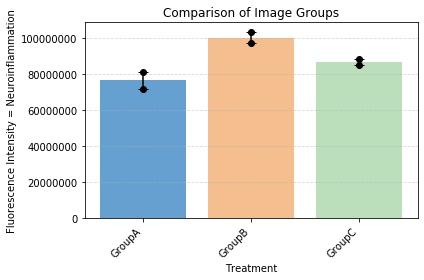

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is your Pandas DataFrame from the initial code

# Get the group names from the DataFrame columns
group_names = df.columns.tolist()

# Calculate mean values for each group
bar_heights = df.mean(axis=0)

# Define bar positions
bar_positions = np.arange(len(bar_heights))

# Plotting the bar chart
colors = ['#3F88C5', '#F2AE72', '#ACD8AA', '#E46A62', 'pink', 'cyan', 'yellow']  # Custom colors for bars
plt.bar(bar_positions, bar_heights, color=colors[:len(group_names)], alpha=0.8)

# Plotting data points as dots
for i, col in enumerate(df.columns):
    plt.plot([bar_positions[i]] * len(df[col]), df[col], 'o', color='black', markersize=6)

# Adding error bars (standard deviation or standard error of the mean)
errors = df.std(axis=0) / np.sqrt(len(df))
plt.errorbar(bar_positions, bar_heights, yerr=errors, fmt='none', ecolor='black', capsize=5)

# Customizing the plot
plt.xlabel('Treatment')
plt.ylabel('Fluorescence Intensity = Neuroinflammation')
plt.title('Comparison of Image Groups')

# Use group_names as x-axis labels with rotation for better visibility
plt.xticks(bar_positions, group_names, rotation=45, ha='right')

# Format y-axis tick labels without scientific notation
plt.ticklabel_format(axis='y', style='plain')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Saving the plot as a high-quality image (e.g., PNG)
plt.savefig('group_comparison.png', dpi=300)

# Displaying the plot
plt.show()

## Plot the graph with exponent y-axis label according to the above defined parameters

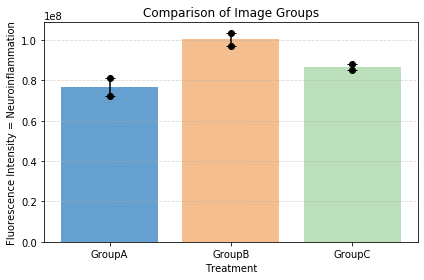

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your Pandas DataFrame from the initial code

# Calculate mean values for each group
bar_heights = df.mean(axis=0)

# Define bar positions
bar_positions = np.arange(len(bar_heights))

# Plotting the bar chart
plt.bar(bar_positions, bar_heights, color=['#3F88C5', '#F2AE72', '#ACD8AA', '#E46A62', 'pink', 'cyan', 'yellow'], alpha=0.8)

# Plotting data points as dots
for i, col in enumerate(df.columns):
    plt.plot([bar_positions[i]] * len(df[col]), df[col], 'o', color='black', markersize=6)

# Adding error bars (standard deviation or standard error of the mean)
errors = df.std(axis=0) / np.sqrt(len(df))
plt.errorbar(bar_positions, bar_heights, yerr=errors, fmt='none', ecolor='black', capsize=5)

# Customizing the plot
plt.xlabel('Treatment')
plt.ylabel('Fluorescence Intensity = Neuroinflammation')
plt.title('Comparison of Image Groups')
plt.xticks(bar_positions, df.columns)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Saving the plot as a high-quality image (e.g., PNG)
plt.savefig('group_comparison.png', dpi=300)

# Displaying the plot
plt.show()

# Perform Statistical Analysis

## One-way ANOVA

In [8]:
pip install scipy statsmodels

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [7]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Assuming df is in Pandas DataFrame from the initial code

# Replace NaN values with np.nan
df_cleaned = df.fillna(np.nan)

# Convert back to DataFrame to use dropna()
df_cleaned = pd.DataFrame(df_cleaned)

# Perform one-way ANOVA, ignoring NaN values
f_statistic, p_value = f_oneway(*[df_cleaned[group].dropna() for group in df_cleaned.columns])

print("One-way ANOVA:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Perform Tukey's HSD test for multiple comparisons, ignoring NaN values
tukey_results = pairwise_tukeyhsd(np.hstack([df_cleaned[group].dropna().values for group in df_cleaned.columns]),
                                  np.hstack([np.repeat(group, len(df_cleaned[group].dropna())) for group in df_cleaned.columns]))

print("\nTukey's HSD Test:")
print(tukey_results)

One-way ANOVA:
F-statistic: 12.060683469049991
P-value: 0.03678870667695076

Tukey's HSD Test:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
group1 group2   meandiff  p-adj      lower          upper     reject
--------------------------------------------------------------------
GroupA GroupB  23621895.0 0.0329   3455972.0781 43787817.9219   True
GroupA GroupC   9897861.0 0.2475 -10268061.9219 30063783.9219  False
GroupB GroupC -13724034.0 0.1273 -33889956.9219  6441888.9219  False
--------------------------------------------------------------------


## t-test

In [8]:
from scipy.stats import ttest_ind
import pandas as pd

# Assuming df is your Pandas DataFrame with columns representing the groups

# Get the column names (group names) from the DataFrame
group_names = df.columns.tolist()

# Display the group names for user selection
print("Available Groups:")
for i, group in enumerate(group_names, start=1):
    print(f"{i}. {group}")

# Ask the user to select two groups for comparison
input_str = input("Enter the numbers of the two groups you want to compare (e.g., '1 2'): ")
selected_groups = [int(num) - 1 for num in input_str.replace(',', ' ').split() if num.isdigit()]

if len(selected_groups) != 2 or not all(0 <= group_index < len(group_names) for group_index in selected_groups):
    print("Invalid input. Please enter the numbers corresponding to two groups.")
    exit(1)

# Extract data from the selected groups
group1_data = df[group_names[selected_groups[0]]].dropna()
group2_data = df[group_names[selected_groups[1]]].dropna()

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(group1_data, group2_data, equal_var=False)  # Assuming unequal variances

print("Independent Samples t-test:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Check significance based on p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The difference between the selected groups is statistically significant.")
else:
    print("There is no significant difference between the selected groups.")


Available Groups:
1. GroupA
2. GroupB
3. GroupC
Enter the numbers of the two groups you want to compare (e.g., '1 2'): 1 3
Independent Samples t-test:
T-statistic: -1.9989073445770336
P-value: 0.25450034840450925
There is no significant difference between the selected groups.
